## Exponential integrators for anisotropic diffusion

We solve
\begin{align}
\partial_t u = \nu \nabla \cdot( \vec b \vec b \cdot \nabla u)
\end{align}
We discretize the anisotropic diffusion operator using dG methods. This leads to an equation of the form
\begin{align}
\partial_t \vec u = -\nu M \vec u
\end{align}
where $\vec u$ is the discretized scalar field $u$ and $M$ is the discrete expression of $-\nabla \cdot \vec b \vec b \cdot \nabla$. Note that we define $M$ positive definite.
The analytical solution for time-independent $\nu$ and $\vec b$ is 
\begin{align}
\vec u(t)  = \exp( M t) \vec u_0
\end{align}
where $\vec u_0$ is the initial condition.

In Feltor the exponential of $M$ can be computed via a Lanczos method tridiagonalization of $M$ followed by an Eigendecomposition of the resulting tridiagonal matrix.

In [1]:
import pyfeltor.dg as dg
import json
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import simplesimdb as simplesim # this one is our own database manager
import subprocess # to capture errors from the simulations
import yaml
import pandas as pd

pd.set_option('display.float_format', lambda x: '%.2e' % x)


In [2]:
def create_inputfile ():
    '''Create an input file for the solvers FELTOR code'''
    return {
        "grid" : {
            "n" : 3,
            "Nx" : 128, 
            "Ny" : 128,
        },
        "bc": ["DIR","DIR"],
        "output":
        {
            "tend" : 3,
            "maxout" : 100
        },
        "matrix-function":
        {
            "eps-rel" : 1e-6, # accuracy for the matrix exponential
        },
        "elliptic" :
        {
            "direction" : "forward" # forward or centered

        }    
    }


In [3]:
# Type make solvers in the repository to have the executable available
m = simplesim.Manager( executable='./diffusion/diffusion', directory='data-diffusion', filetype = 'nc')
# Takes about a minute ...
ncfile=m.create(create_inputfile(), error = "display")
print( ncfile)

Existing simulation e02173...4f114a.nc
data-diffusion/e0217399bdf4076ddc68376939c2cbd3b64f114a.nc


In [4]:
ncin = Dataset( ncfile, 'r', format="NETCDF4")
print( "FILE CONTENTS")
for v in ncin.variables:
    if v == "time" : 
        print(f"{v} {ncin.variables[v].shape}")
    else : 
        print( f"{v} {ncin.variables[v].shape}")
ncin.close()

FILE CONTENTS
time (101,)
y (384,)
x (384,)
u (101, 384, 384)


Existing simulation e02173...4f114a.nc
Time =  2.999999999999995


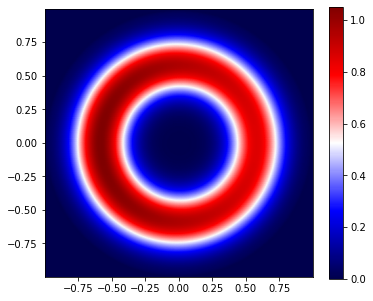

In [5]:
ncfile=m.create(create_inputfile(), error = "display")
ncin = Dataset( ncfile, 'r', format="NETCDF4")

x = ncin["x"][:]
y = ncin["y"][:]
vo = ncin["u"][-1,:,:]
time = ncin["time"][:]
plt.figure(figsize=(6, 5))
plt.pcolormesh(x,y,vo,
               shading='gouraud',
               cmap = 'seismic')#, vmin = -0.1, vmax = 0.1 )
plt.colorbar()
print( "Time = ", time[-1])
plt.axis('scaled')
plt.show()

Let us create a nice gif

In [6]:
import xfeltor

<IPython.core.display.Javascript object>


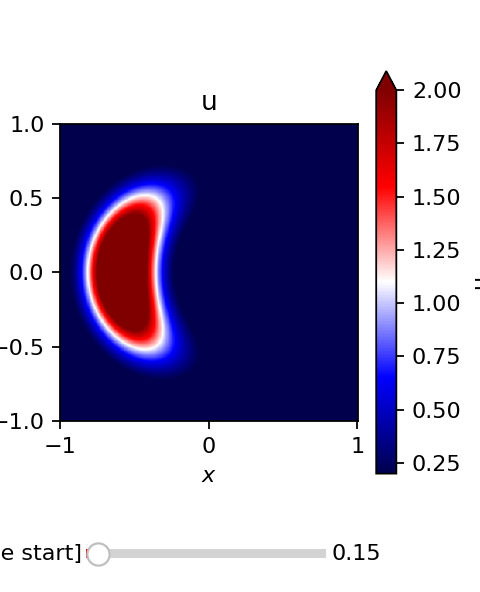

u data passed has 3 dimensions - will use animatplot.blocks.Pcolormesh()


Text(0, 0.5, '$y$')

In [9]:
%matplotlib notebook
fig,ax=plt.subplots(1,1,figsize=(1*3,1*3.7),dpi= 80, facecolor='w', edgecolor='k')
ds = xfeltor.open_feltordataset(ncfile)

norm = colors.Normalize( vmin = 0.2, vmax = 2)
# cmap = plt.get_cmap( 'bone_r').copy()
cmap = plt.get_cmap( 'seismic').copy()
anim = ds["u"][:,:,:].feltor.animate2D(
    x="x", y="y",ax = ax, fps=10,
    shading='auto', norm=norm, cmap=cmap, extend='max', controls='timeline'
)

ax.set_aspect('equal')
ax.set_xlabel( r"$x$")
ax.set_ylabel( r"$y$")


In [10]:
%matplotlib inline